### **Dataset Specification**

***Link:*** https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

**Diabetes_012:** 0 = no diabetes / 1 = prediabetes / 2 = diabetes

**HighBP:** 0 = no high BP / 1 = high BP

**HighChol:** 0 = no high cholesterol / 1 = high cholesterol

**CholCheck:** 0 = no cholesterol check in 5 years / 1 = yes cholesterol check in 5 years

**BMI:** Body Mass Index

**Smoker:** Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no / 1 = yes

**Stroke:** (Ever told) you had a stroke. 0 = no / 1 = yes

**HeartDiseaseorAttack:** coronary heart disease (CHD) or myocardial infarction (MI) 0 = no / 1 = yes

**PhysActivity:** physical activity in past 30 days - not including job 0 = no / 1 = yes

**Fruits:** Consume Fruit 1 or more times per day 0 = no / 1 = yes

**Veggies:** Consume Vegetables 1 or more times per day 0 = no / 1 = yes

**HvyAlcoholConsump:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no / 1 = yes

**AnyHealthcare:** Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no / 1 = yes

**NoDocbcCost:** Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no / 1 = yes

**GenHlth:** Would you say that in general your health is: scale 1-5 / 1 = excellent / 2 = very good / 3 = good / 4 = fair / 5 = poor

**MentHlth:** Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how

**PhysHlth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

**DiffWalk:** Do you have serious difficulty walking or climbing stairs? 0 = no / 1 = yes

**Sex:** 0 = female / 1 = male

**Age:** 13-level age category (_AGEG5YR see codebook) 1 = 18-24 / 9 = 60-64 / 13 = 80 or older

**Education:** Education level (EDUCA see codebook) scale 1-6 / 1 = Never attended school or only kindergarten / 2 = Grades 1 through 8

**Income:** Income scale (INCOME2 see codebook) scale 1-8 / 1 = less than $10,000 / 5 = less than $35,000 / 8 = $75,000 or more

### **EDA - Univariate & Multivariate Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("diabetes-5.csv")

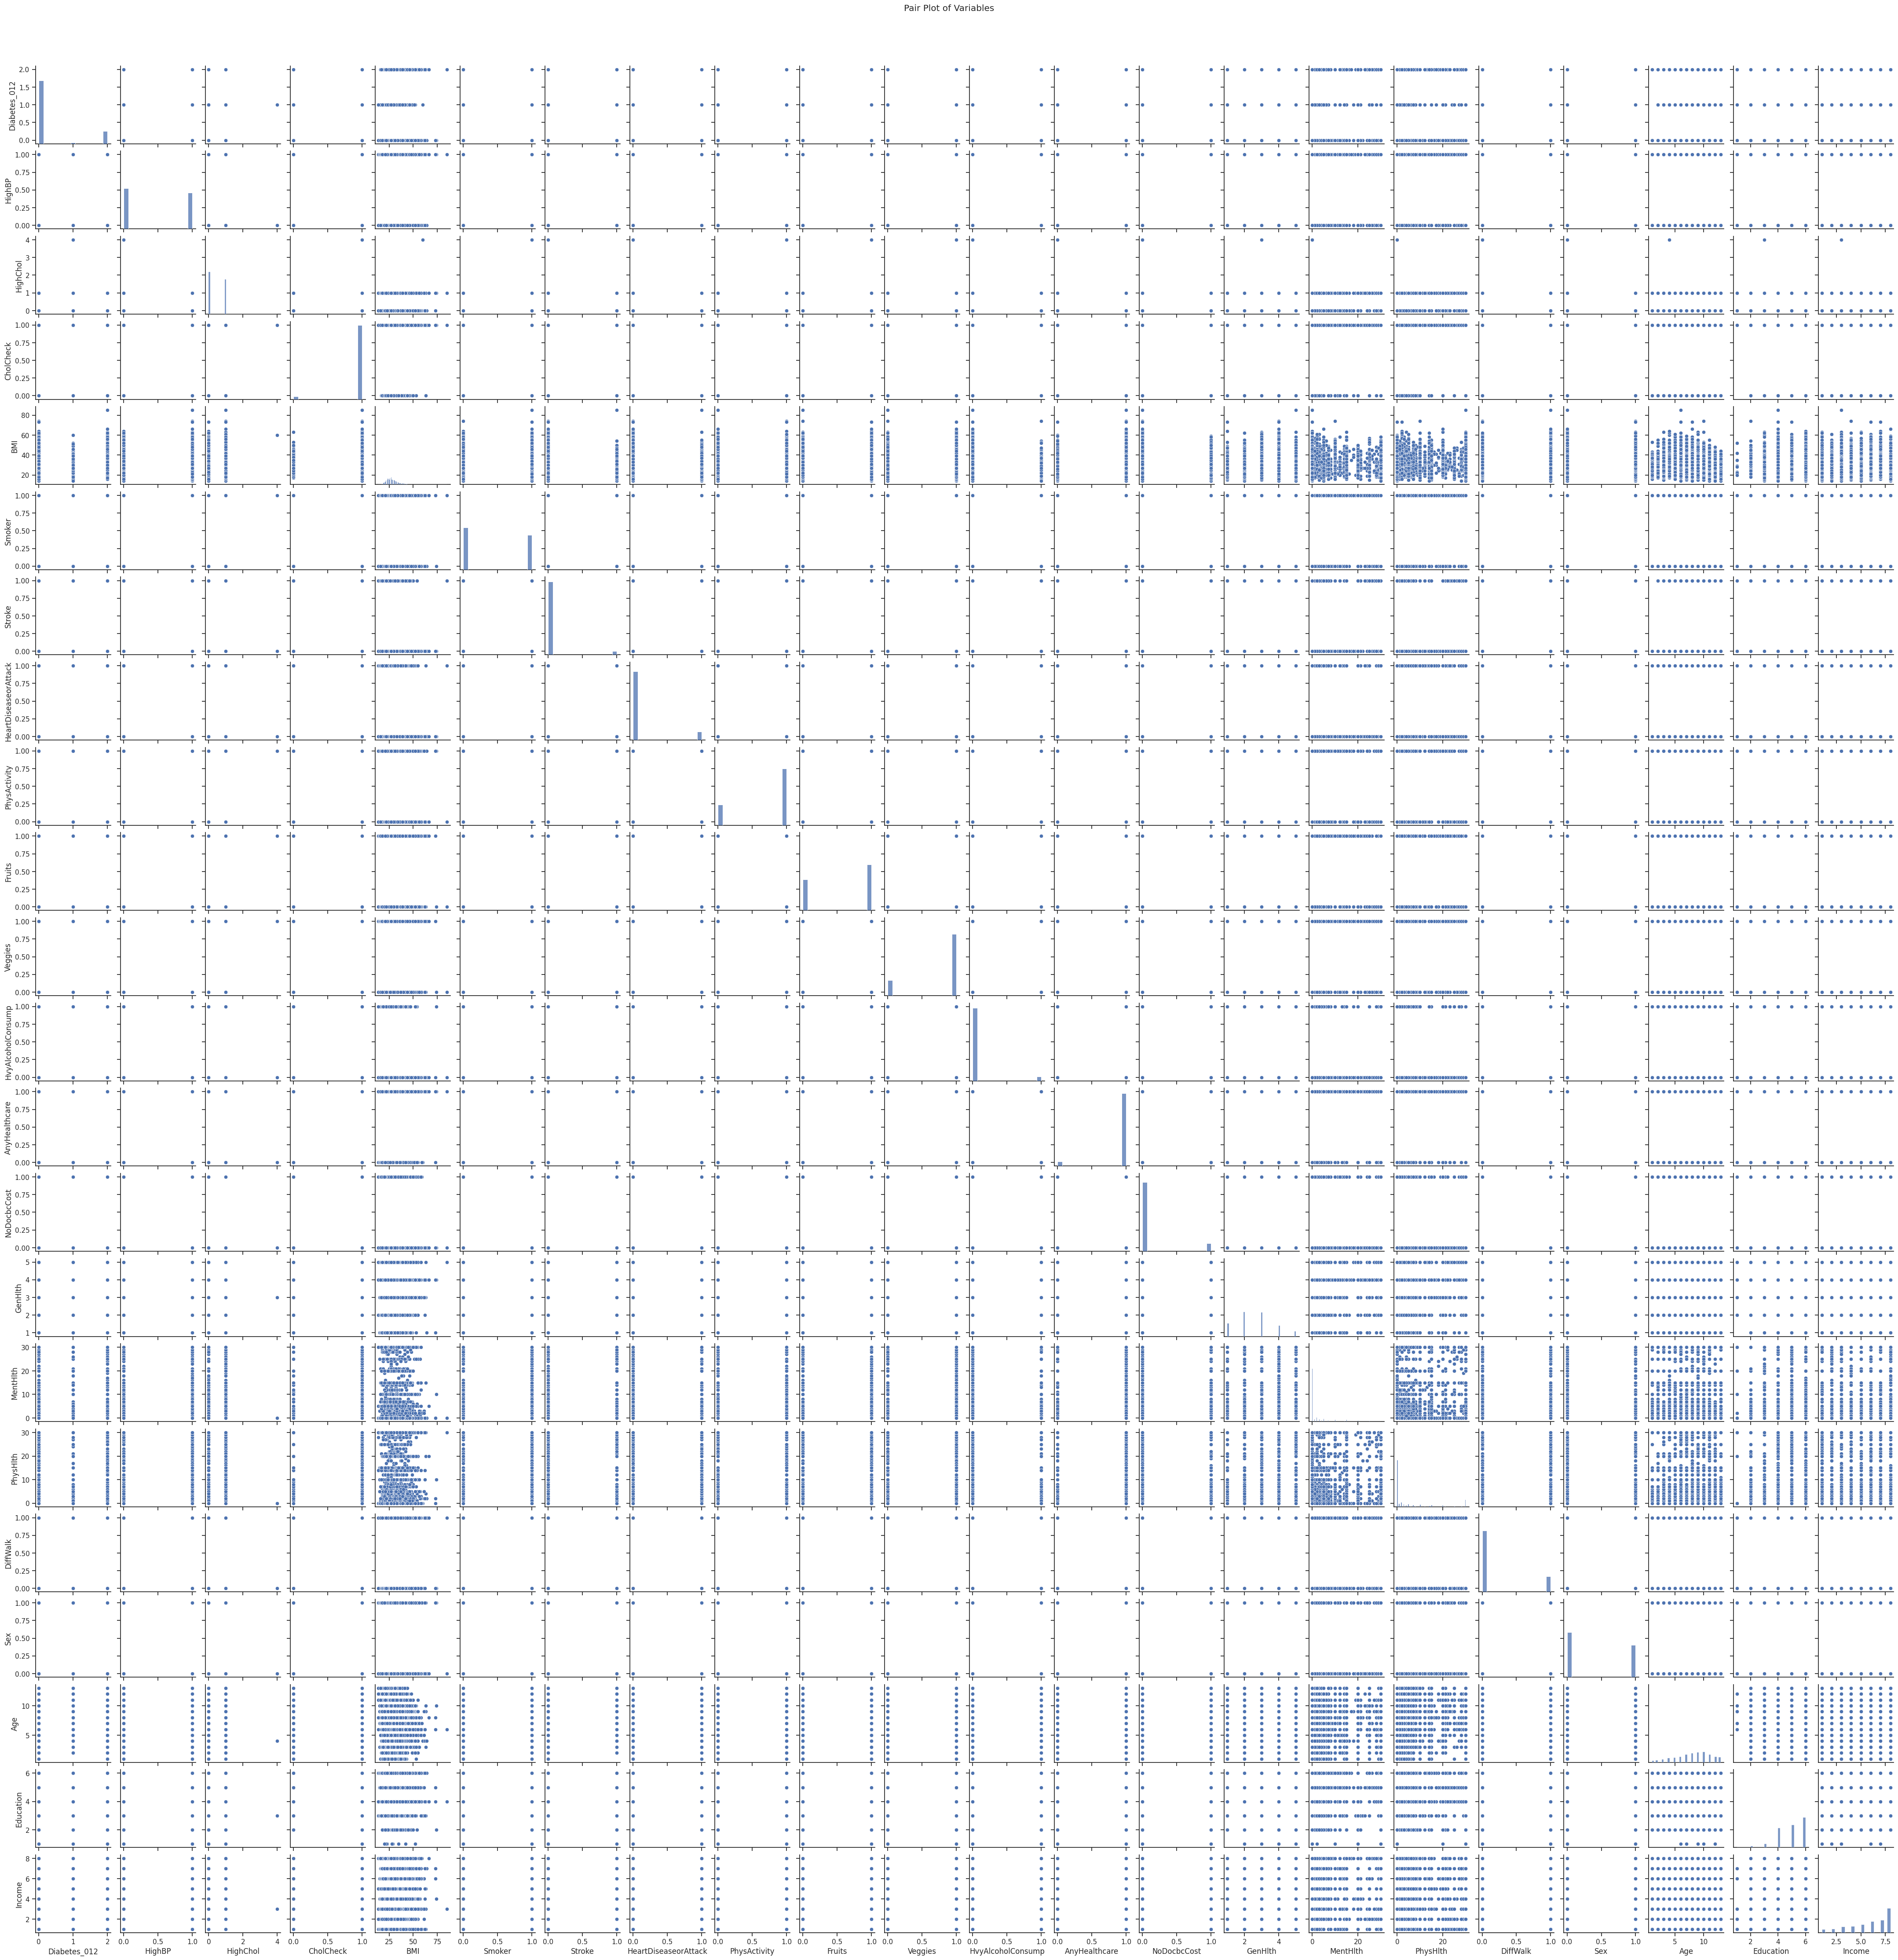

In [2]:
# Create a pair plot for variables
sns.set(style="ticks")
sns.pairplot(df, height=2)
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

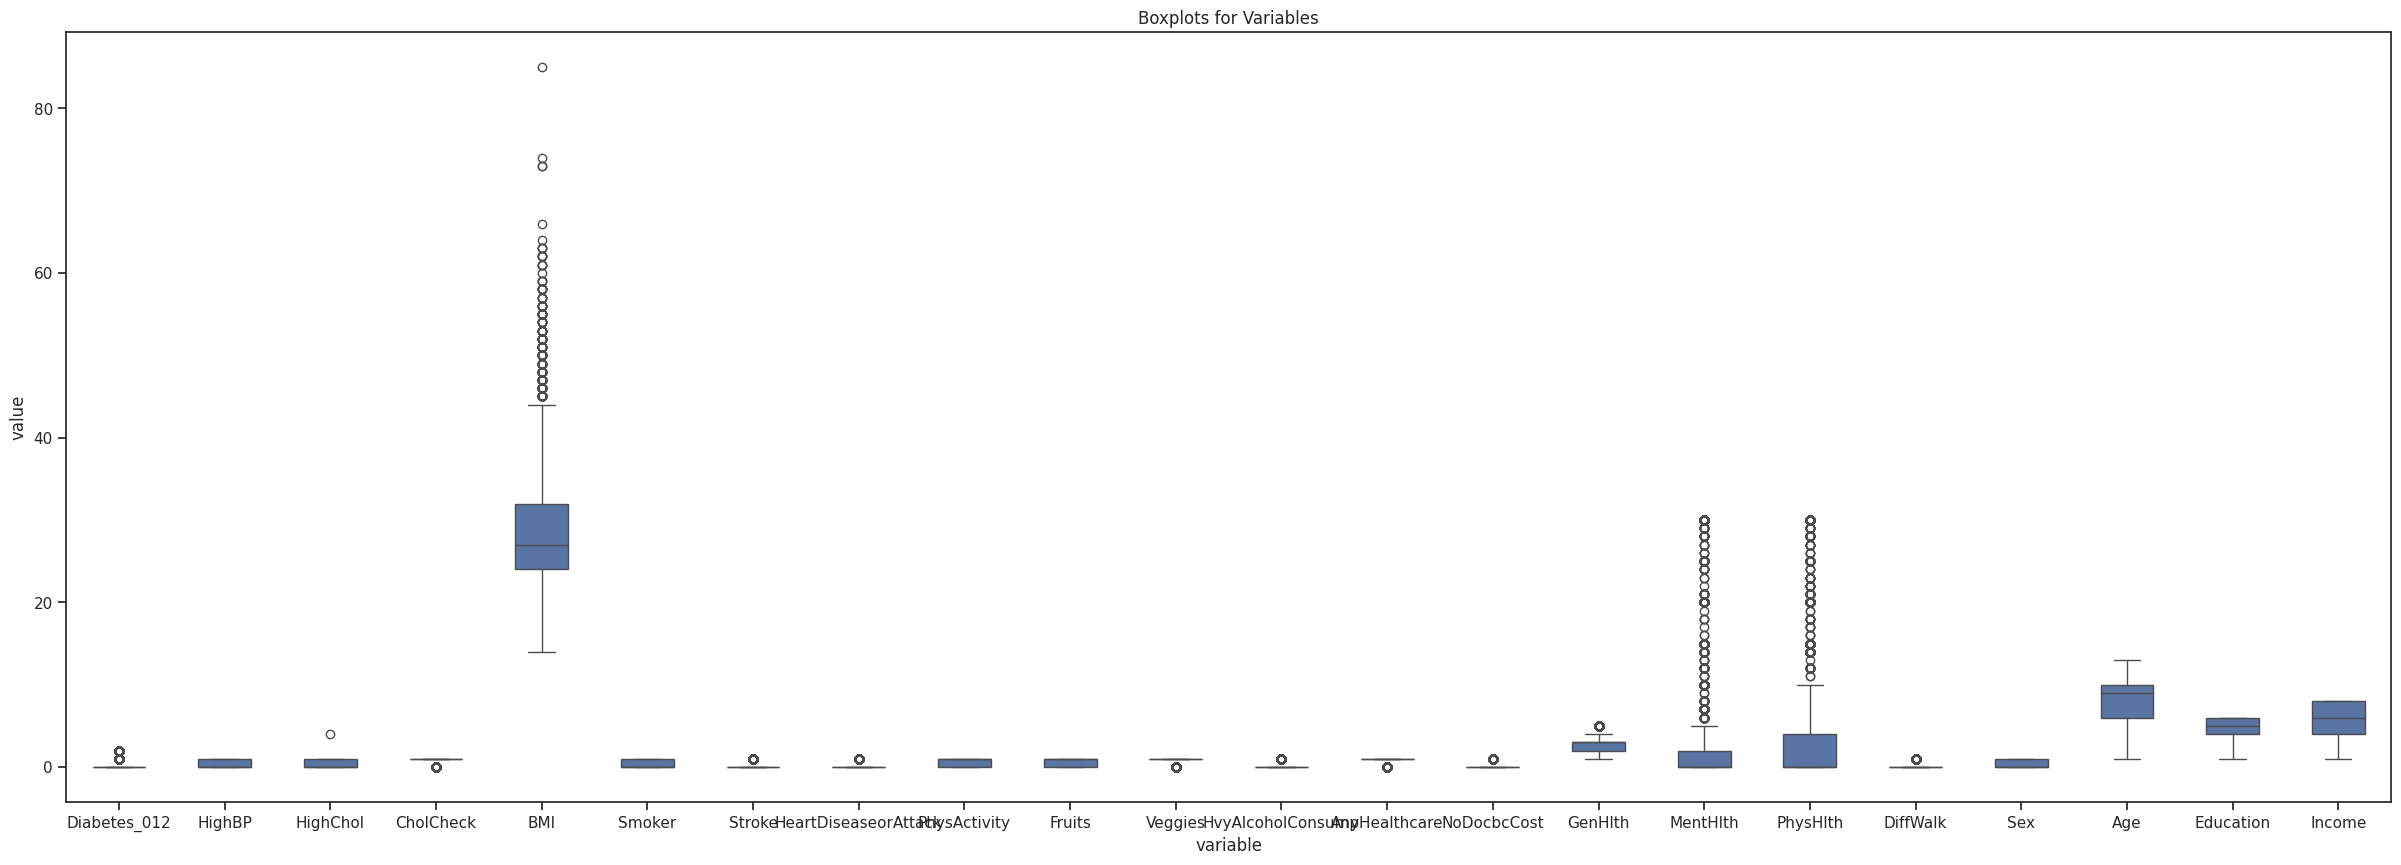

In [3]:
# Create box plot for checking outliers
plt.figure(figsize=(30, 10))
# Create boxplots for each variable
sns.boxplot(x='variable', y='value', data=pd.melt(df), width=0.5)
plt.title('Boxplots for Variables')
plt.show()

### **Data preparation & Feature Engineering**

In [4]:
# Remove duplicate rows
df_no_duplicate = df.drop_duplicates()
df_no_duplicate.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,...,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000,12561.000000
mean,0.345753,0.474405,0.455378,0.962503,28.649073,0.453149,0.050394,0.107396,0.731072,0.596131,...,0.942282,0.103176,2.628374,3.508399,4.875408,0.203567,0.416129,8.219250,4.982804,5.849136
std,0.744481,0.499364,0.498983,0.189984,6.414039,0.497820,0.218765,0.309628,0.443420,0.490691,...,0.233219,0.304201,1.106482,7.826387,9.242461,0.402666,0.492935,3.003451,0.995223,2.129358
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,4.000000,1.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
# Check for missing values
missing_values = df_no_duplicate.isnull().sum()

# Print missing values
print("Missing Values:")
print(missing_values)

Missing Values:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [6]:
# Replace the outlier values with the Median of that attribute

import numpy as np

df_no_outliers = df_no_duplicate
column = ['Age', 'BMI', 'MentHlth', 'PhysHlth']

data_outlier = {}
for col in column:
    data_outlier[col] = []
    outliers = 0

# Calculate the max and min thresholds based on the 1.5*IQR formula
    q25 = df_no_outliers[col].quantile(0.25)
    q75 = df_no_outliers[col].quantile(0.75)
    intr_qr = q75 - q25
    max = q75 + (1.5*intr_qr)
    min = q25 - (1.5*intr_qr)

# Discover the outlier values of each attribute and replace them with the median of that attribute
    for x in df_no_outliers[col]:
      if x < min or x > max:
         outliers += 1
         df_no_outliers.loc[df_no_outliers[col] == x, col] = df_no_outliers[col].median()

# Summarize the number of outlier values per attribute as a dictionary
    data_outlier[col].append(outliers)

# Create a dataframe to review the number of outlier values
outliers_list = pd.DataFrame(data_outlier)
outliers_list.head()

/tmp/ipykernel_20533/2351841307.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[df_no_outliers[col] == x, col] = df_no_outliers[col].median()
/tmp/ipykernel_20533/2351841307.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[df_no_outliers[col] == x, col] = df_no_outliers[col].median()
/tmp/ipykernel_20533/2351841307.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[df_

,Age,BMI,MentHlth,PhysHlth
0,0,24,25,20


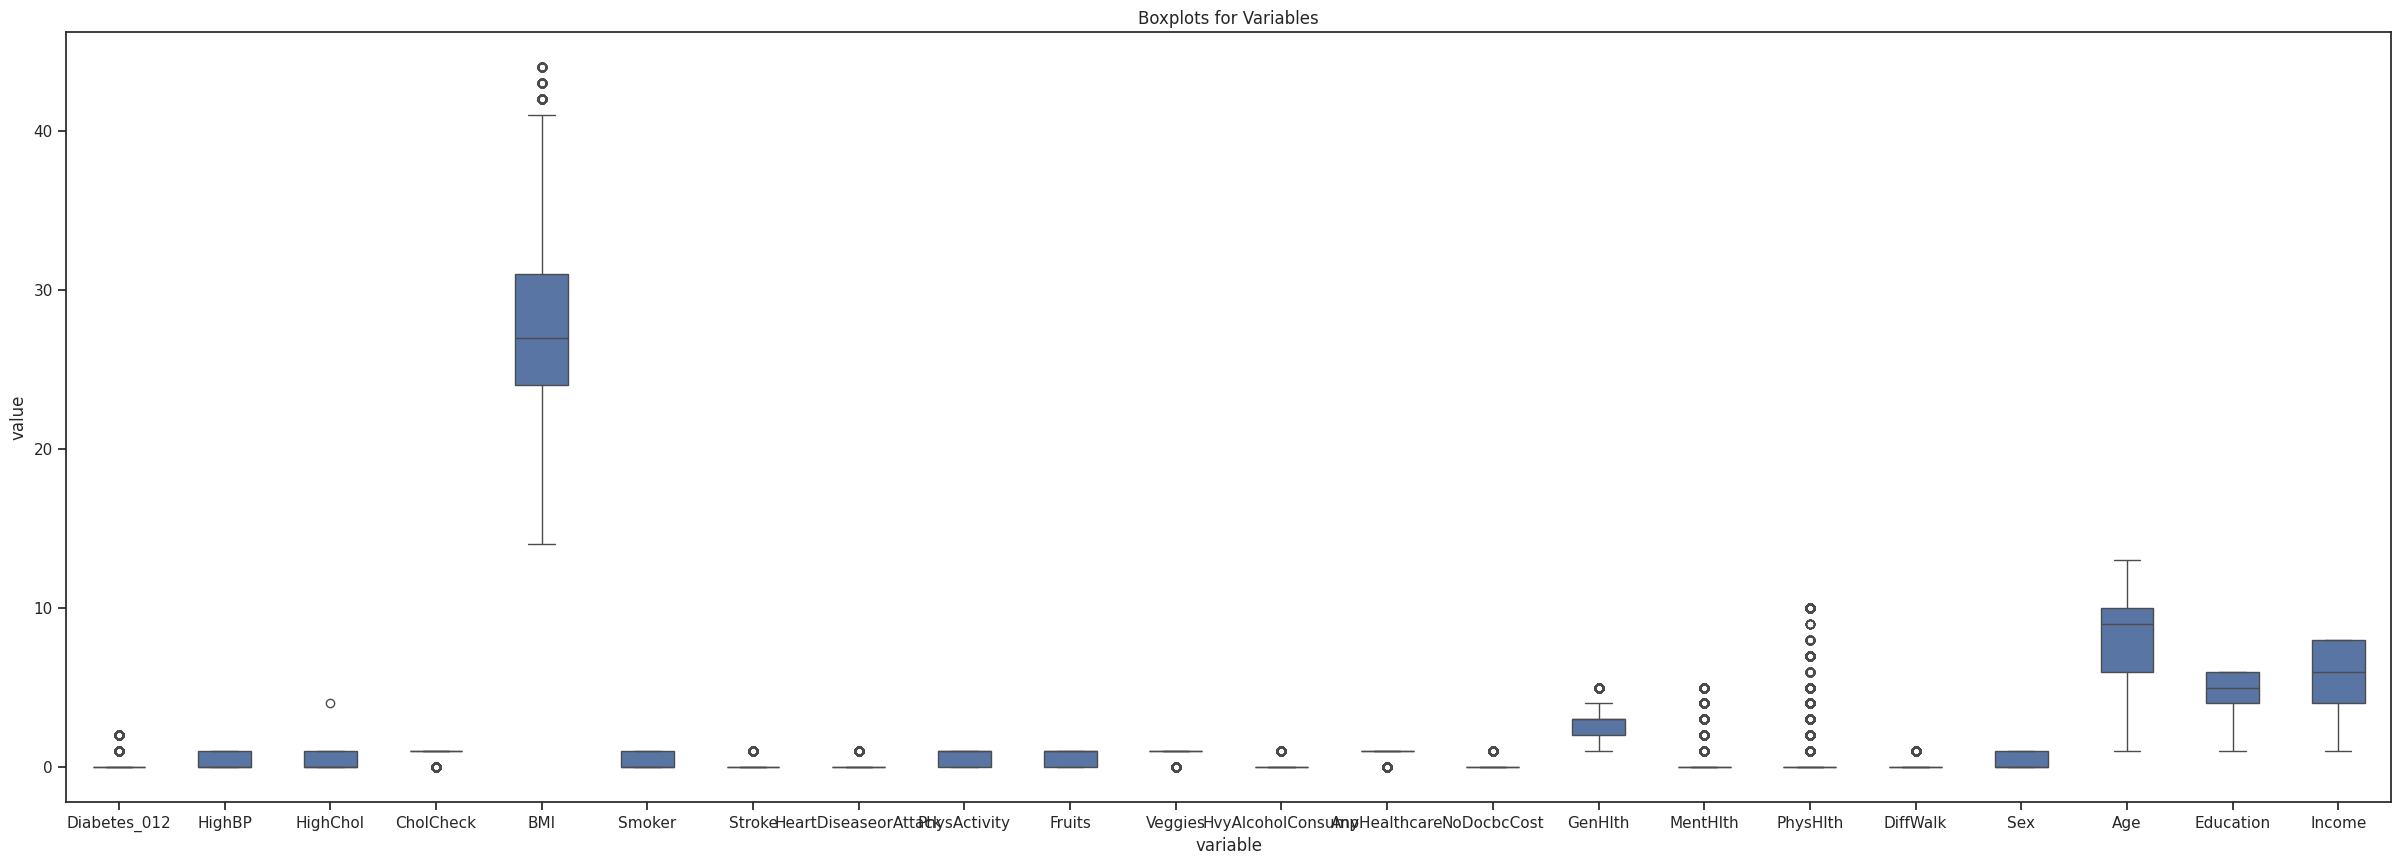

In [7]:
# Create box plot for checking outliers
plt.figure(figsize=(30, 10))
# Create boxplots for each variable
sns.boxplot(x='variable', y='value', data=pd.melt(df_no_outliers), width=0.5)
plt.title('Boxplots for Variables')
plt.show()

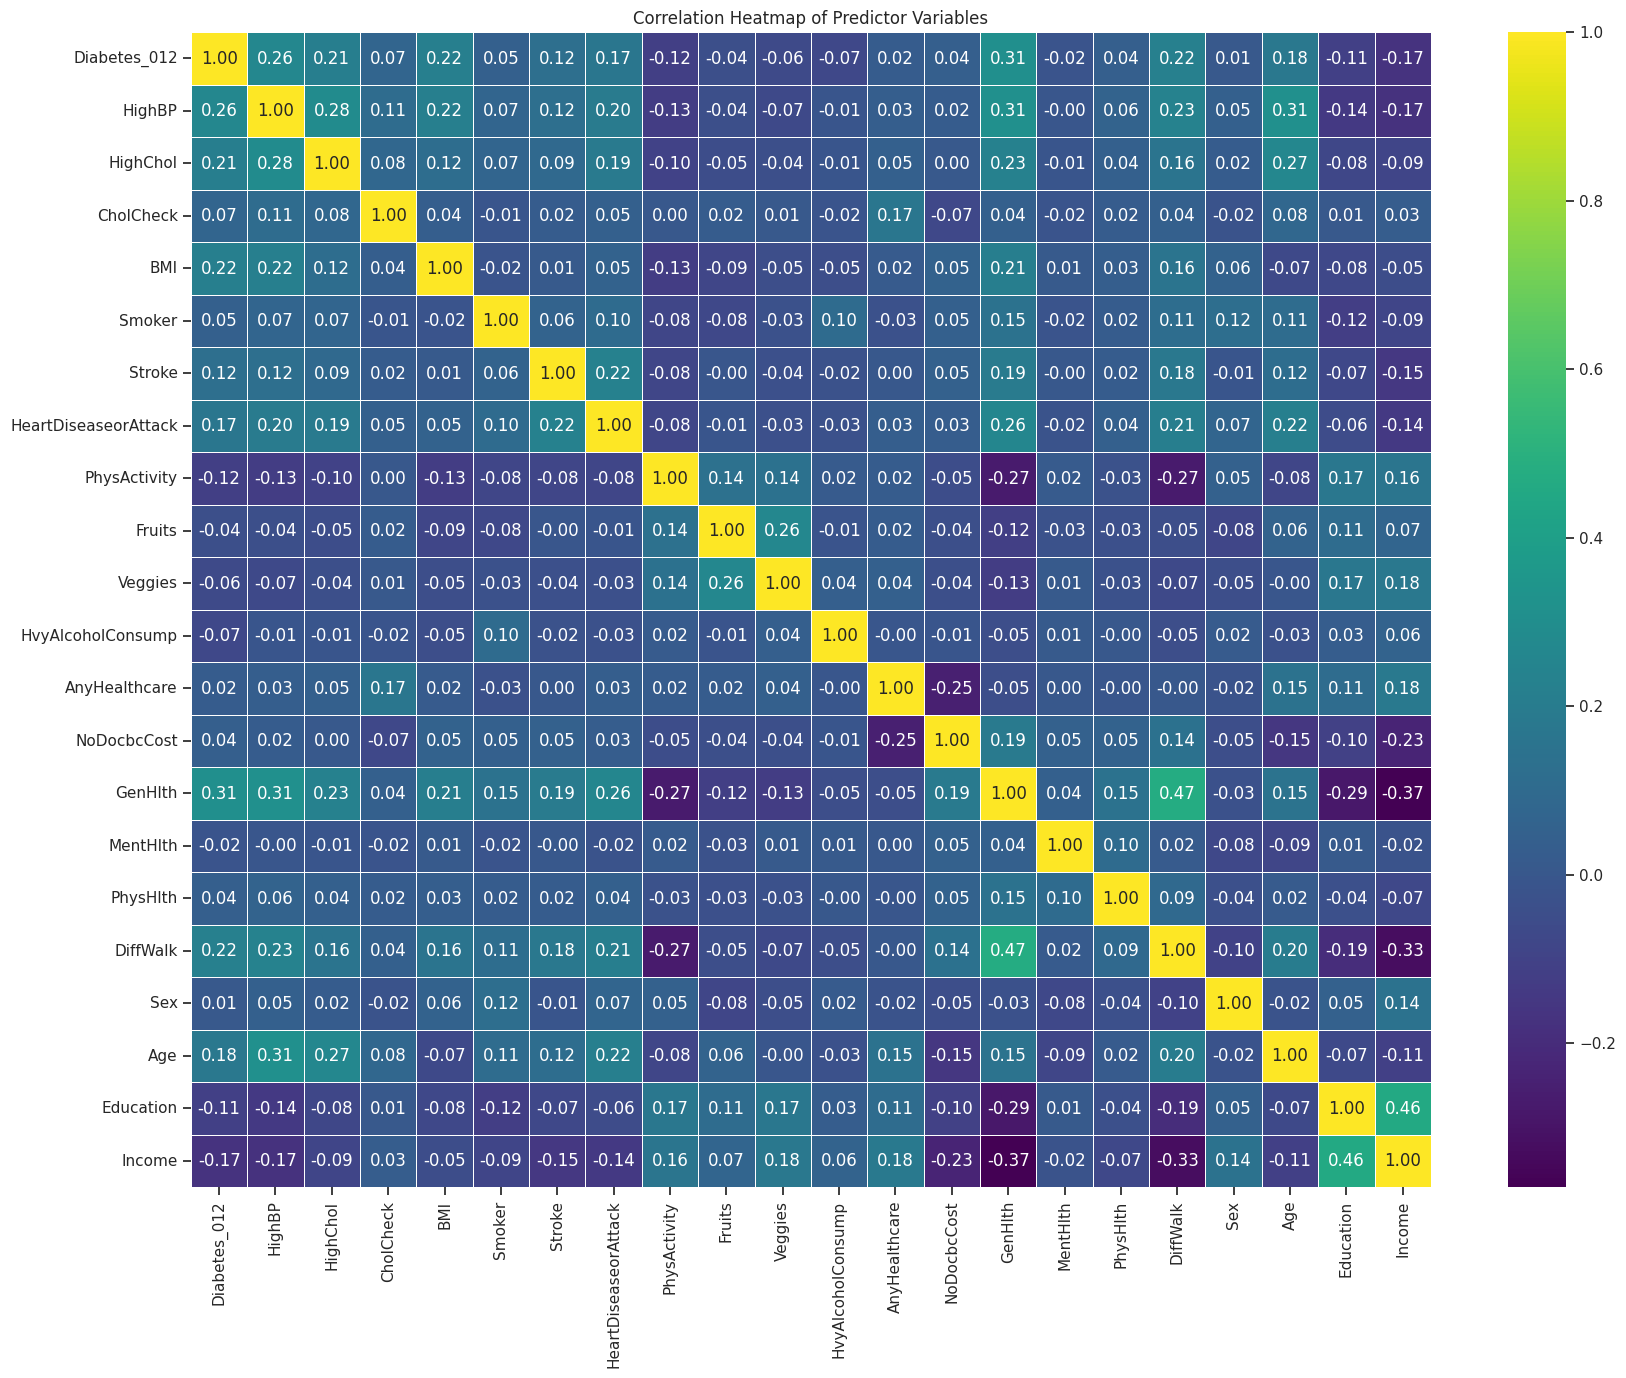

In [8]:
# Calculate the correlation matrix
correlation_matrix = df_no_outliers.corr()
plt.figure(figsize=(20, 15))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

In [9]:
# Print correlation coefficients greater than a certain threshold (e.g., 0.7)
threshold = 0.4
high_correlation_pairs = [(i, j) for i in range(len(correlation_matrix.columns)) for j in range(i+1, len(correlation_matrix.columns)) if abs(correlation_matrix.iloc[i, j]) > threshold]

# Print highly correlated pairs
print("Highly Correlated Variable Pairs:")
for pair in high_correlation_pairs:
    print(f"{correlation_matrix.columns[pair[0]]} - {correlation_matrix.columns[pair[1]]}: {correlation_matrix.iloc[pair[0], pair[1]]}")


Highly Correlated Variable Pairs:
GenHlth - DiffWalk: 0.473952556202461
Education - Income: 0.4564160458425071


### **Modeling & Evaluation**

In [10]:
# Select the first column as the target column
target_column = df_no_outliers.columns[0]
target = df_no_outliers[target_column]

# Select the rest of the columns as features
features = df_no_outliers.drop(target_column, axis=1)

In [11]:
# Split dataset into train (80%) and test (20%) based on "target" and "features"

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


**Traditional Model Evaluation**

In [12]:
# Perform Naïve Bayes Classification, and evaluate the performance

# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)



F1 Score: 0.7483766145238785
Precision: 0.7837747218880436
Recall: 0.7317946677278153
Accuracy: 0.7317946677278153


In [13]:
# Perform Random Forest Classification, and evalute the performance

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on validation set
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions, average='weighted')
precision = precision_score(y_test, rf_predictions, average='weighted')
recall = recall_score(y_test, rf_predictions, average='weighted')

# Print the results
print("Random Forest F1 Score:", f1)
print("Random Forest Precision:", precision)
print("Random Forest Recall:", recall)
print("Accuracy:", accuracy)


Random Forest F1 Score: 0.7689090532267645
Random Forest Precision: 0.7543840902291368
Random Forest Recall: 0.8074015121368882
Accuracy: 0.8074015121368882


In [14]:
# Perform the voting classification

from sklearn.ensemble import VotingClassifier

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[('gnb', clf), ('rf', rf_classifier)],
    voting='hard'
)

# Train the classifier
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Voting Classifier Accuracy:', accuracy)
print('Voting Classifier F1 Score:', f1)
print('Voting Classifier Precision:', precision)
print('Voting Classifier Recall:', recall)


Voting Classifier Accuracy: 0.8113808197373656
Voting Classifier F1 Score: 0.7706328480138953
Voting Classifier Precision: 0.758648048291702
Voting Classifier Recall: 0.8113808197373656


In [15]:
import joblib

joblib.dump(voting_clf, 'voting_clf.pkl')

['voting_clf.pkl']